### Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from google.colab import files

# Upload a file (prompts a file chooser)
uploaded = files.upload()


# Load the data
df = pd.read_csv("train.csv")

# Select relevant features
X = df[['OverallQual']].values  # Predictor
y = df['SalePrice'].values      # Target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Saving train.csv to train.csv


In [3]:
def linear_regression_scratch(X, y):
    x = X.flatten()
    y = y.flatten()
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean)**2)

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return slope, intercept

# Train model
slope, intercept = linear_regression_scratch(X_train, y_train)

# Prediction function
def predict_custom(X, slope, intercept):
    return slope * X + intercept

# Predict on train and test sets
y_train_pred_custom = predict_custom(X_train, slope, intercept)
y_test_pred_custom = predict_custom(X_test, slope, intercept)


In [4]:
mse_custom = mean_squared_error(y_test, y_test_pred_custom)
print("Custom Model Test MSE:", mse_custom)

# Train sklearn model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on train and test
y_train_pred_sklearn = lr.predict(X_train)
y_test_pred_sklearn = lr.predict(X_test)

# MSE
mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
print("Sklearn Model Test MSE:", mse_sklearn)



Custom Model Test MSE: 2681026163.5090904
Sklearn Model Test MSE: 2681026163.5090904


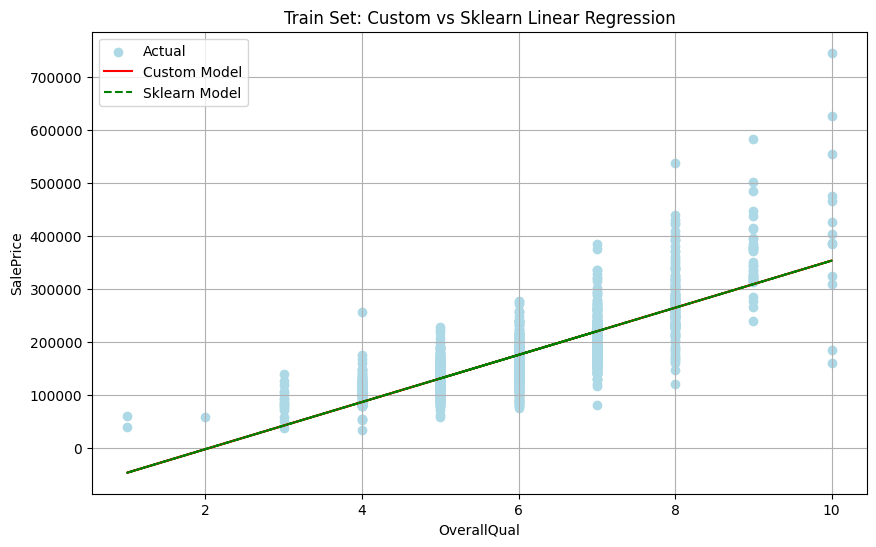

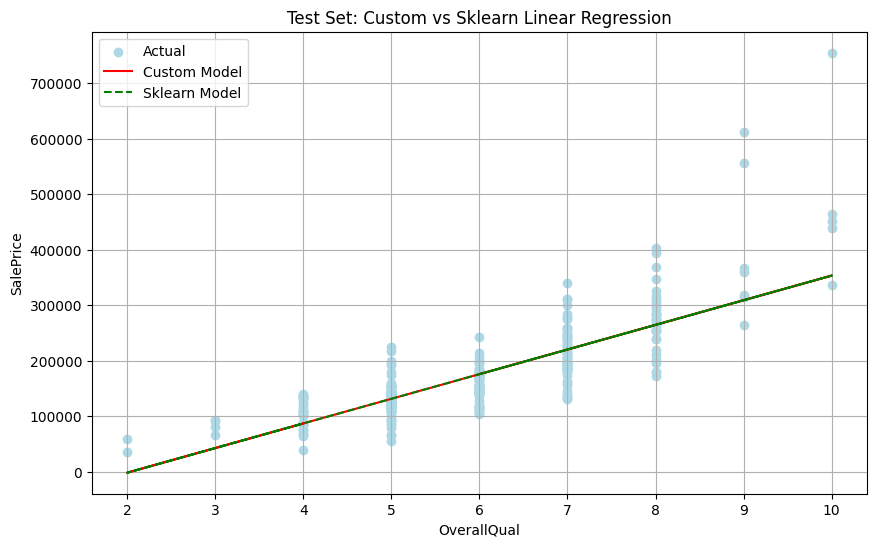

In [5]:
# Plot 1: Train set
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='lightblue', label='Actual')
plt.plot(X_train, y_train_pred_custom, color='red', label='Custom Model')
plt.plot(X_train, y_train_pred_sklearn, color='green', linestyle='--', label='Sklearn Model')
plt.title('Train Set: Custom vs Sklearn Linear Regression')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='lightblue', label='Actual')
plt.plot(X_test, y_test_pred_custom, color='red', label='Custom Model')
plt.plot(X_test, y_test_pred_sklearn, color='green', linestyle='--', label='Sklearn Model')
plt.title('Test Set: Custom vs Sklearn Linear Regression')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()


### Question 2

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


from google.colab import files

# Upload a file (prompts a file chooser)
uploaded = files.upload()

# Load data
df = pd.read_csv("StudentsPerformance.csv")

# Create binary target column
df['PassedMath'] = (df['math score'] >= 50).astype(int)

# Select feature and label
X = df[['reading score']].values
y = df['PassedMath'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Saving StudentsPerformance.csv to StudentsPerformance.csv


In [13]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression with gradient descent
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term
    theta = np.zeros(X_b.shape[1])  # Initialize weights



    for i in range(epochs):
        z = X_b @ theta
        h = sigmoid(z)
        gradient = (1 / m) * (X_b.T @ (h - y))
        theta -= lr * gradient

    return theta


In [14]:
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept for prediction too
    probs = sigmoid(X_b @ theta)             # Compute predicted probabilities
    return (probs >= 0.5).astype(int), probs  # Convert probabilities to 0/1


In [15]:
theta = train_logistic_regression(X_train, y_train)

# Predict function
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    probs = sigmoid(X_b @ theta)
    return (probs >= 0.5).astype(int), probs

# Predict on test data
y_pred_custom, y_prob_custom = predict(X_test, theta)

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Custom Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))



Custom Logistic Regression Accuracy: 0.83
Confusion Matrix:
 [[  0  34]
 [  0 166]]


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Custom
print("=== Custom Model Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_sklearn = model.predict(X_test)  # <-- This line defines 'y_pred_sklearn'

# STEP 4: Evaluate
print("Sklearn Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sklearn))


# Sklearn
print("\n=== Sklearn Model Metrics ===")
print("Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall:", recall_score(y_test, y_pred_sklearn))
print("F1-Score:", f1_score(y_test, y_pred_sklearn))


=== Custom Model Metrics ===
Accuracy: 0.83
Precision: 0.83
Recall: 1.0
F1-Score: 0.907103825136612
Sklearn Logistic Regression Accuracy: 0.865
Confusion Matrix:
 [[ 14  20]
 [  7 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.41      0.51        34
           1       0.89      0.96      0.92       166

    accuracy                           0.86       200
   macro avg       0.78      0.68      0.72       200
weighted avg       0.85      0.86      0.85       200


=== Sklearn Model Metrics ===
Accuracy: 0.865
Precision: 0.888268156424581
Recall: 0.9578313253012049
F1-Score: 0.9217391304347826
